## Konstrukcja obwodów kwantowych w Pennylane

In [15]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1, shots=100)

@qml.qnode(dev)
def circ():
    qml.Hadamard(wires=0)
    return qml.counts()

In [16]:
circ()

{'0': tensor(49, requires_grad=True), '1': tensor(51, requires_grad=True)}

In [17]:
print(qml.draw(circ)())

0: ──H─┤  Counts


(<Figure size 400x200 with 1 Axes>, <Axes: >)

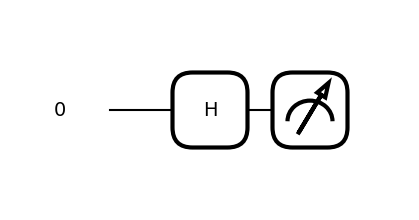

In [18]:
qml.draw_mpl(circ)()

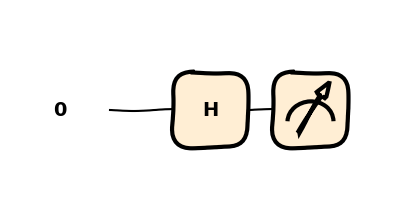

In [19]:
import matplotlib.pyplot as plt
qml.drawer.use_style("sketch")
fig, ax = qml.draw_mpl(circ)()
plt.show()

Matplotlib is building the font cache; this may take a moment.


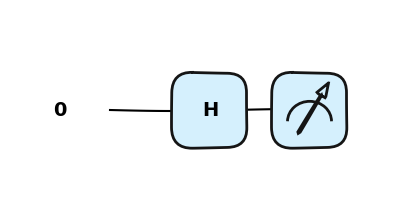

In [20]:
qml.drawer.use_style("pennylane_sketch")
fig, ax = qml.draw_mpl(circ)()
plt.show()

## STANY JEDNO KUBITOWE

$$
\ket{\psi}=\ket{0}
$$

In [21]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    return qml.state()

In [22]:
qc()

tensor([1.+0.j, 0.+0.j], requires_grad=True)

$$
\ket{\psi}=\ket{1}
$$

In [23]:
from pennylane import numpy as np
from pennylane.ops import StatePrep

In [24]:
stan = np.array([0,1])

@qml.qnode(dev)
def circuit():
    StatePrep(stan, wires=0)
    return qml.state()

circuit()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

In [26]:
@qml.qnode(dev)
def qc():
    qml.X(wires=0)
    return qml.state()

qc()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

$$
\ket{\psi}=\frac{1}{\sqrt{2}} (\ket{0} + \ket{1} ) 
$$

In [32]:
stan = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

@qml.qnode(dev)
def qc_0():
    qml.StatePrep(stan,wires=0)
    return qml.state()

qc_0()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

## STANY DWU KUBITOWE

$$
\ket{\psi}=\ket{00}
$$
$$
\ket{\psi}=\ket{01}
$$
$$
\ket{\psi}=\ket{10}
$$
$$
\ket{\psi}=\ket{11}
$$

In [33]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def qc():
    #qml.X(wires=1)
    #qml.X(wires=0)
    return qml.state()

qc()

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

$$
\ket{\psi}=\frac{1}{2}\left( \ket{00} + \ket{01} + \ket{10} + \ket{11} \right)
$$

In [34]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state()

qc()

tensor([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j], requires_grad=True)